In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import mdshare
import pyemma
import pandas as pd
from pyemma.util.contexts import settings
import pyemma.coordinates as coor

In [2]:
#Loading files
#pdb taken of frame 1
pdb = 'Fr1.pdb'
files = []
files += ['protein_only_frame%i.dcd'%d for d in range(1,7)]
files += ['protein_only_frame%i.dcd'%d for d in range(8,26)]
files += ['protein_only_frame27.dcd']

In [3]:
print(files)

['protein_only_frame1.dcd', 'protein_only_frame2.dcd', 'protein_only_frame3.dcd', 'protein_only_frame4.dcd', 'protein_only_frame5.dcd', 'protein_only_frame6.dcd', 'protein_only_frame8.dcd', 'protein_only_frame9.dcd', 'protein_only_frame10.dcd', 'protein_only_frame11.dcd', 'protein_only_frame12.dcd', 'protein_only_frame13.dcd', 'protein_only_frame14.dcd', 'protein_only_frame15.dcd', 'protein_only_frame16.dcd', 'protein_only_frame17.dcd', 'protein_only_frame18.dcd', 'protein_only_frame19.dcd', 'protein_only_frame20.dcd', 'protein_only_frame21.dcd', 'protein_only_frame22.dcd', 'protein_only_frame23.dcd', 'protein_only_frame24.dcd', 'protein_only_frame25.dcd', 'protein_only_frame27.dcd']


In [4]:
for i in range(len(files)):
    print(i, files[i])

0 protein_only_frame1.dcd
1 protein_only_frame2.dcd
2 protein_only_frame3.dcd
3 protein_only_frame4.dcd
4 protein_only_frame5.dcd
5 protein_only_frame6.dcd
6 protein_only_frame8.dcd
7 protein_only_frame9.dcd
8 protein_only_frame10.dcd
9 protein_only_frame11.dcd
10 protein_only_frame12.dcd
11 protein_only_frame13.dcd
12 protein_only_frame14.dcd
13 protein_only_frame15.dcd
14 protein_only_frame16.dcd
15 protein_only_frame17.dcd
16 protein_only_frame18.dcd
17 protein_only_frame19.dcd
18 protein_only_frame20.dcd
19 protein_only_frame21.dcd
20 protein_only_frame22.dcd
21 protein_only_frame23.dcd
22 protein_only_frame24.dcd
23 protein_only_frame25.dcd
24 protein_only_frame27.dcd


In [6]:
feat = pyemma.coordinates.featurizer(pdb)
#Adjacent residue C-alpha distance removed using excluded_neighbors=1
feat.add_distances_ca(periodic=True, excluded_neighbors=1)

In [7]:
len(feat.describe()[:])

36

In [8]:
data = coor.source(files,features = feat,stride =1)

Obtaining file info:   0%|                               | 0/25 [00:00<?, ?it/s]

In [9]:
print('type of data:', type(data))

type of data: <class 'pyemma.coordinates.data.feature_reader.FeatureReader'>


In [10]:
print(feat.describe())

['DIST: TYR 1 CA 4 - ASP 3 CA 46', 'DIST: TYR 1 CA 4 - PRO 4 CA 60', 'DIST: TYR 1 CA 4 - GLU 5 CA 72', 'DIST: TYR 1 CA 4 - THR 6 CA 87', 'DIST: TYR 1 CA 4 - GLY 7 CA 101', 'DIST: TYR 1 CA 4 - THR 8 CA 108', 'DIST: TYR 1 CA 4 - TRP 9 CA 122', 'DIST: TYR 1 CA 4 - TYR 10 CA 146', 'DIST: TYR 2 CA 25 - PRO 4 CA 60', 'DIST: TYR 2 CA 25 - GLU 5 CA 72', 'DIST: TYR 2 CA 25 - THR 6 CA 87', 'DIST: TYR 2 CA 25 - GLY 7 CA 101', 'DIST: TYR 2 CA 25 - THR 8 CA 108', 'DIST: TYR 2 CA 25 - TRP 9 CA 122', 'DIST: TYR 2 CA 25 - TYR 10 CA 146', 'DIST: ASP 3 CA 46 - GLU 5 CA 72', 'DIST: ASP 3 CA 46 - THR 6 CA 87', 'DIST: ASP 3 CA 46 - GLY 7 CA 101', 'DIST: ASP 3 CA 46 - THR 8 CA 108', 'DIST: ASP 3 CA 46 - TRP 9 CA 122', 'DIST: ASP 3 CA 46 - TYR 10 CA 146', 'DIST: PRO 4 CA 60 - THR 6 CA 87', 'DIST: PRO 4 CA 60 - GLY 7 CA 101', 'DIST: PRO 4 CA 60 - THR 8 CA 108', 'DIST: PRO 4 CA 60 - TRP 9 CA 122', 'DIST: PRO 4 CA 60 - TYR 10 CA 146', 'DIST: GLU 5 CA 72 - GLY 7 CA 101', 'DIST: GLU 5 CA 72 - THR 8 CA 108', 'DIST

In [11]:
tica = pyemma.coordinates.tica(data, lag=100)
tica_output = tica.get_output()

calculate covariances:   0%|                             | 0/25 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/25 [00:00<?, ?it/s]

/home/praveen/miniconda3/envs/pyemma/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/praveen/miniconda3/envs/pyemma/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


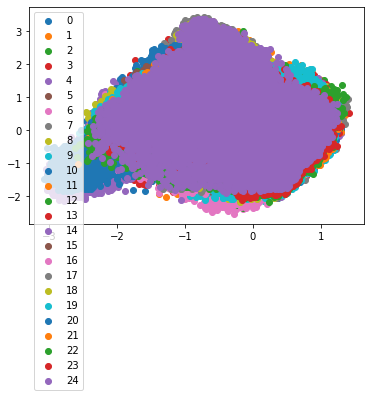

In [12]:
for i in range(25):
    plt.scatter(tica_output[i].T[0],tica_output[i].T[1],label='%d'%i)
plt.legend()

In [13]:
lag =100

In [14]:
tica_obj = coor.tica(data,lag = lag,dim =5,kinetic_map = False)

calculate covariances:   0%|                             | 0/25 [00:00<?, ?it/s]

In [15]:
Y = tica_obj.get_output()[0]

getting output of TICA:   0%|                            | 0/25 [00:00<?, ?it/s]

Text(0.5, 0, 'time')

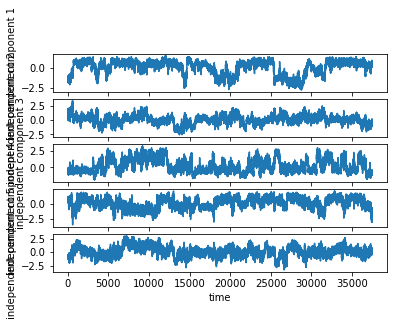

In [16]:
plt.subplot2grid((5,1),(0,0))
plt.plot(Y[:,0])
plt.ylabel('independent component 1')
plt.subplot2grid((5,1),(1,0))
plt.plot(Y[:,1])
plt.ylabel('independent component 2')
plt.subplot2grid((5,1),(2,0))
plt.plot(Y[:,2])
plt.ylabel('independent component 3')
plt.subplot2grid((5,1),(3,0))
plt.plot(Y[:,3])
plt.ylabel('independent component 4')
plt.subplot2grid((5,1),(4,0))
plt.plot(Y[:,4])
plt.ylabel('independent component 5')
plt.xlabel('time')

In [17]:
#histogram data
z, x, y = np.histogram2d(Y[:, 0], Y[:, 1], bins = 50)

In [18]:
F = -np.log(z)
extent = [x[0],x[-1],y[0],y[-1]]

/tmp/ipykernel_6666/219391111.py:1: RuntimeWarning: divide by zero encountered in log
  F = -np.log(z)


Text(0, 0.5, 'Independent component 2')

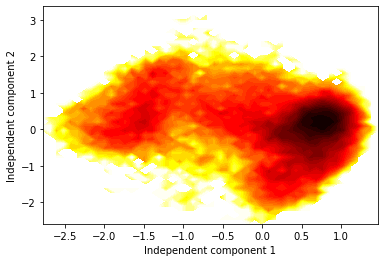

In [19]:
plt.contourf(F.T,50,cmap = plt.cm.hot, extent = extent)
plt.xlabel("Independent component 1")
plt.ylabel("Independent component 2")

In [20]:
#Saving trajectories
np.savetxt('tICA_eigenvectors.txt',tica_obj.eigenvectors)

In [21]:
tica_obj.eigenvalues

array([0.88693563, 0.80661098, 0.74906687, 0.74445412, 0.69977334,
       0.68659179, 0.63930175, 0.6058981 , 0.57813007, 0.57281437,
       0.56880819, 0.54125934, 0.52170587, 0.48893472, 0.4764998 ,
       0.42477402, 0.41451724, 0.39346985, 0.38984576, 0.36650308,
       0.3610125 , 0.34577833, 0.326515  , 0.30809938, 0.30677419,
       0.28465778, 0.27886535, 0.27189471, 0.24616773, 0.20774066,
       0.19452525, 0.16299036, 0.13556195, 0.11284913, 0.09119607,
       0.02606072])

In [22]:
IC1 = tica_output[0].T[0]
IC2 = tica_output[0].T[1]

f1 = open('2d-tICA-trajectory.dat','w')
for i in range(len(IC1)):
    print(IC1[i],IC2[i],file=f1)
f1.close()

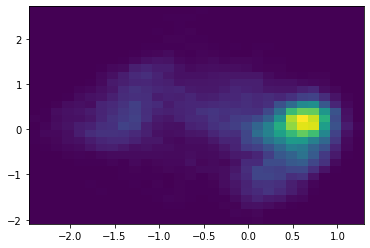

In [23]:
l = np.loadtxt('2d-tICA-trajectory.dat')
histgm, x, y, fig = plt.hist2d(l[:,0],l[:,1],bins=30,density=True)

In [24]:
np.shape(tica_output)

(25, 37500, 26)

In [25]:
np.shape(tica_output[0])

(37500, 26)

In [26]:
np.shape(tica_output[0][1])

(26,)

In [27]:
np.shape(tica_output[0][:,0])

(37500,)

In [28]:
np.shape(tica_output[0].T[0])

(37500,)

In [29]:
for i in range(0,25):
    for j in range(4):
        l1 = tica_output[i][:,j] #First index - trajectory (i), j-> TICA 
        np.savetxt('Tica_Trajectories/Traj%d_Tica%d'%(i,j),l1,fmt='%0.3f')

Text(0.5, 0, 'time')

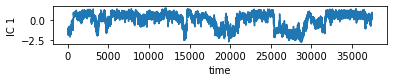

In [30]:
plt.subplot2grid((5,1),(0,0))
plt.plot(Y[:,0])
plt.ylabel('IC 1')

plt.xlabel('time')

Text(0.5, 0, 'time')

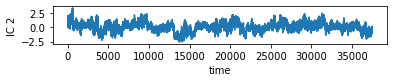

In [31]:
plt.subplot2grid((5,1),(1,0))
plt.plot(Y[:,1])
plt.ylabel('IC 2')
plt.xlabel('time')

Text(0.5, 0, 'time')

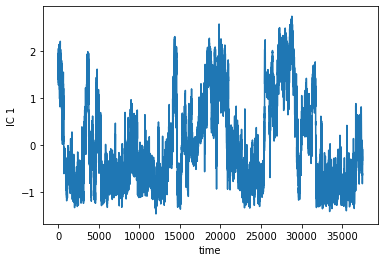

In [31]:
plt.plot(Y[:,0])
plt.ylabel('IC 1')

plt.xlabel('time')